# 지도 히트맵

* 데이터 컬럼중 자치구가 포함된 인사이트들만 실행
* 수치는 합계기준으로 산출되어있음

### 1. 통신사데이터 불러오기

In [1]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# 통신사 데이터 불러오기
excelFile = 'C:/Users/chunc/Desktop/데이터 샘플\파이널프로젝트 데이터/202211_202301_통신정보(쇼핑전처리).xlsx'
df = pd.read_excel(excelFile, usecols = 'A:L')
df.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,"쇼핑 서비스 사용일수: 4분위수, 25%","쇼핑 서비스 사용일수: 4분위수, 50%","쇼핑 서비스 사용일수: 4분위수, 75%"
0,1125070,강동구,둔촌1동,2,25,586.00,319.71,0.00,141.43,50.00,158.33,208.33
1,1102060,중구,을지로동,2,50,51.00,23.31,18.31,102.00,13.33,81.67,163.33
2,1125070,강동구,둔촌1동,1,25,740.00,355.32,52.86,127.95,43.33,81.67,201.67
3,1102057,중구,필동,2,75,152.00,61.90,82.61,34.21,3.33,18.33,30.00
4,1101067,종로구,창신1동,1,70,108.59,48.88,55.50,34.17,3.33,10.00,35.00


### 2. 택배데이터 불러오기

In [3]:
# 데이터 불러오기
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/파이널프로젝트 데이터/자치구단위 월별 택배 도착지 데이터.csv'
df2 = pd.read_csv(csvFile, encoding = 'euc-kr')
df2.head()

,기준년월(BASE_DY),자치구(ADDR),대분류_착지물동량_가구/인테리어(E_C_01),대분류_착지물동량_기타(E_C_02),대분류_착지물동량_도서/음반(E_C_03),대분류_착지물동량_디지털/가전(E_C_04),대분류_착지물동량_생활/건강(E_C_05),대분류_착지물동량_스포츠/레저(E_C_06),대분류_착지물동량_식품(E_C_07),대분류_착지물동량_출산/육아(E_C_08),...,중분류_착지물동량_스킨케어(E_C_11_09),중분류_착지물동량_클렌징(E_C_11_10),중분류_착지물동량_향수(E_C_11_11),중분류_착지물동량_헤어스타일링(E_C_11_12),중분류_착지물동량_헤어케어(E_C_11_13),Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146
0,202103,강남구,25035.0,281991.0,27333.0,51770.0,198635.0,13054,173813,14363,...,25652,9804,2174,3588,5058,NaN,NaN,NaN,NaN,NaN
1,202104,서초구,19508.0,259466.0,48374.0,38415.0,165677.0,17343,175048,12809,...,16368,8505,1938,3307,12029,NaN,NaN,NaN,NaN,NaN
2,202105,서대문구,16904.0,384154.0,29689.0,46772.0,76597.0,17717,466881,14987,...,18570,5389,1509,2114,11127,NaN,NaN,NaN,NaN,NaN
3,202102,강서구,46705.0,216690.0,49027.0,30791.0,292619.0,12504,161749,8194,...,27236,7376,2187,1101,13519,NaN,NaN,NaN,NaN,NaN
4,202102,성동구,35119.0,240743.0,94856.0,88985.0,158192.0,16432,262624,11800,...,33971,5788,1853,3256,7275,NaN,NaN,NaN,NaN,NaN


In [4]:
# 대분류 컬럼만 1차적으로 확인하기 위해 필요 컬럼만 골라서 df2에 할당
# 대분류 중 기타항목 제거
new_df = df2[['기준년월(BASE_DY)', '자치구(ADDR)', '대분류_착지물동량_가구/인테리어(E_C_01)',
              '대분류_착지물동량_도서/음반(E_C_03)','대분류_착지물동량_디지털/가전(E_C_04)',
              '대분류_착지물동량_생활/건강(E_C_05)','대분류_착지물동량_스포츠/레저(E_C_06)',
              '대분류_착지물동량_식품(E_C_07)','대분류_착지물동량_출산/육아(E_C_08)',
              '대분류_착지물동량_패션의류(E_C_09)','대분류_착지물동량_패션잡화(E_C_10)',
              '대분류_착지물동량_화장품/미용(E_C_11)','중분류_착지물동량_DIY자재/용품(E_C_01_01)']
]

In [5]:
# 보다 작성하기 편하게 컬럼명 변경
new_df.columns = ['기준년월', '자치구', '가구/인테리어',
       '도서/음반', '디지털/가전',
       '생활/건강', '스포츠/레저',
       '식품', '출산/육아',
       '패션의류', '패션잡화',
       '화장품/미용', 'DIY자재/용품']

In [6]:
new_df.head()

,기준년월,자치구,가구/인테리어,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,DIY자재/용품
0,202103,강남구,25035.0,27333.0,51770.0,198635.0,13054,173813,14363,308202,56279,113419,1456
1,202104,서초구,19508.0,48374.0,38415.0,165677.0,17343,175048,12809,192657,49330,84964,2119
2,202105,서대문구,16904.0,29689.0,46772.0,76597.0,17717,466881,14987,319933,50778,37971,1085
3,202102,강서구,46705.0,49027.0,30791.0,292619.0,12504,161749,8194,81789,37966,60391,1463
4,202102,성동구,35119.0,94856.0,88985.0,158192.0,16432,262624,11800,181675,54699,173161,964


## 지도 매핑을 위한 shp파일 불러오기

In [7]:
# shp파일 확인
myMap = 'C:/Users/chunc/Desktop/데이터 샘플/파이널프로젝트 데이터/SIG_20221119/sig.shp'
df1 = gpd.read_file(myMap, encoding = 'euc-kr')
df1.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


<Axes: >

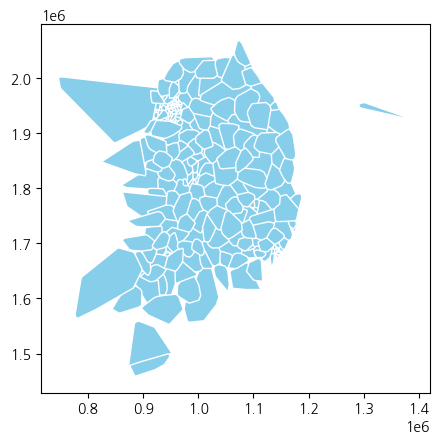

In [8]:
# 지도 출력
df1.convex_hull.plot(color = 'skyblue', edgecolor = "w")

In [9]:
# 서울만 표시하기
# SIG_CD 데이터 형식을 정수 integer로 변경
df1.info()
type_df1 = df1.astype({ 'SIG_CD' : 'int' })
type_df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SIG_CD      250 non-null    object  
 1   SIG_ENG_NM  250 non-null    object  
 2   SIG_KOR_NM  250 non-null    object  
 3   geometry    250 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 7.9+ KB
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SIG_CD      250 non-null    int32   
 1   SIG_ENG_NM  250 non-null    object  
 2   SIG_KOR_NM  250 non-null    object  
 3   geometry    250 non-null    geometry
dtypes: geometry(1), int32(1), object(2)
memory usage: 7.0+ KB


In [10]:
seoul = type_df1[type_df1['SIG_CD'] < 20000]

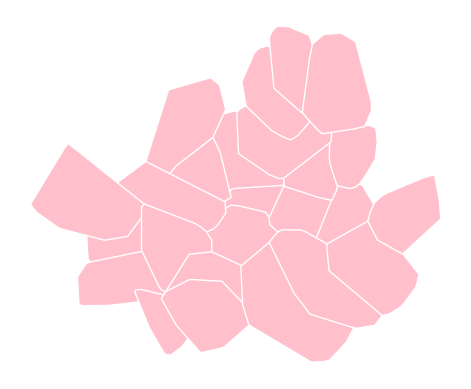

In [11]:
ax = seoul.convex_hull.plot(color = 'pink', edgecolor = "w")
# 축제거
ax.set_axis_off()
plt.show()

## 통신사데이터

### 자치구별 총인구수 지도 히트맵

In [12]:
# 자치구별 총인구수 합계
result1 = df[['자치구', '총인구수']].groupby(['자치구'], as_index = False).sum().sort_values(by = '총인구수', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,총인구수
0,송파구,528482.22
1,강서구,467858.93
2,노원구,448140.80
3,관악구,447628.06
4,강남구,438342.97
5,은평구,391502.98
6,성북구,373924.02
7,구로구,370283.54
8,양천구,368116.85
9,강동구,365204.32


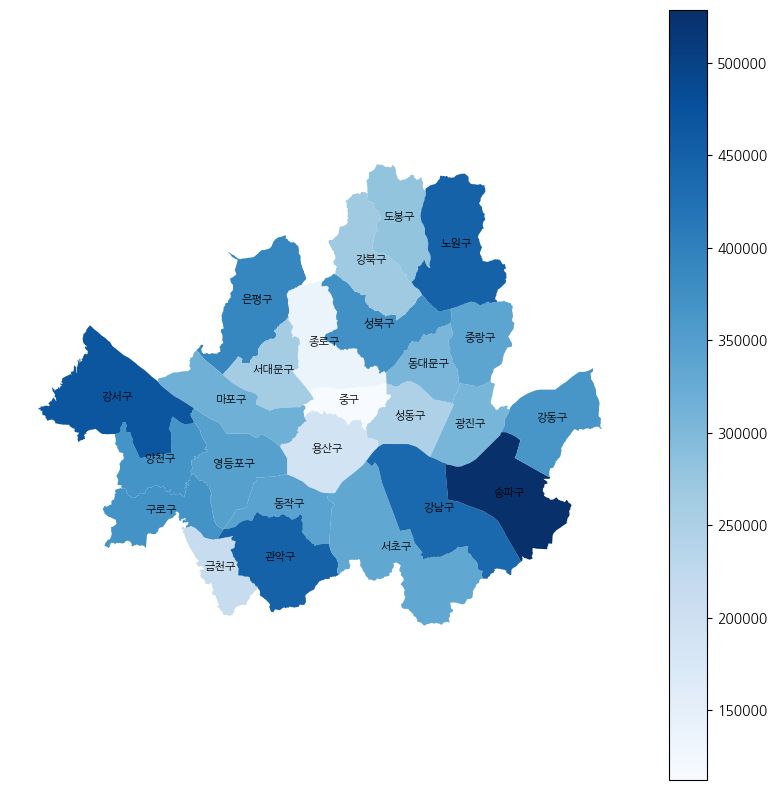

In [13]:
# 자치구 이름 기준으로 데이터 병합
merged_data1 = seoul.merge(result1, left_on = 'SIG_KOR_NM', right_on = '자치구')

fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data1.plot(column = '총인구수', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data1.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

### 자치구별 1인가구수 지도 히트맵

In [14]:
# 자치구별 1인 가구수 합계
result2 = df[['자치구', '1인가구수']].groupby(['자치구'], as_index = False).sum().sort_values(by = '1인가구수', ascending = False).reset_index(drop = True)
result2.head(10)

,자치구,1인가구수
0,관악구,140447.33
1,강서구,83887.16
2,강남구,83017.11
3,송파구,79947.04
4,영등포구,73849.38
5,광진구,72089.47
6,마포구,70558.84
7,동작구,69772.56
8,동대문구,68411.59
9,성북구,65850.52


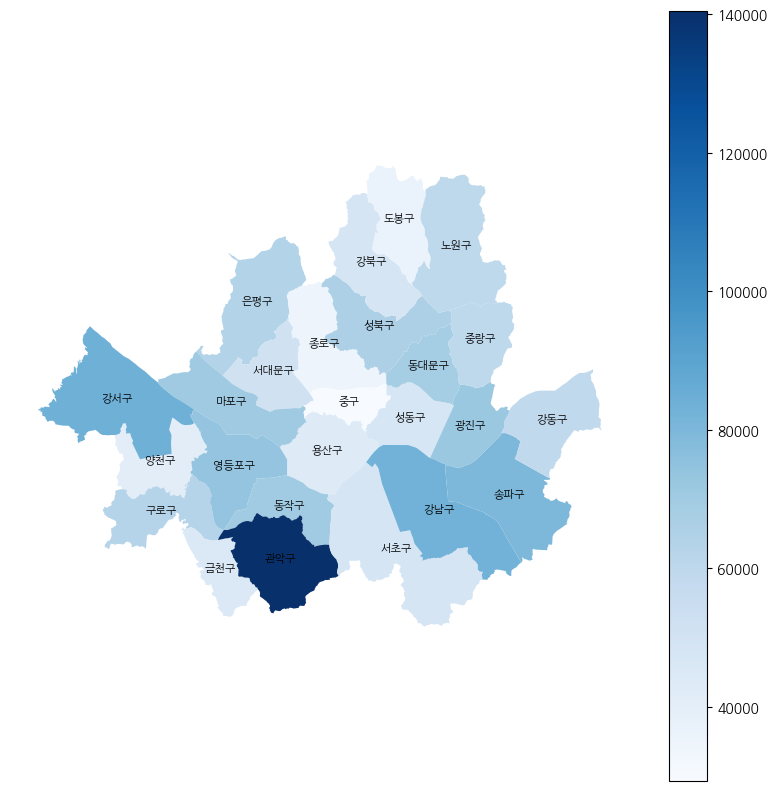

In [15]:
merged_data2 = seoul.merge(result2, left_on = 'SIG_KOR_NM', right_on = '자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data2.plot(column = '1인가구수', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data2.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

### 자치구별 쇼핑 서비스 사용 미추정 인구수 지도 히트맵

In [16]:
# 자치구별 쇼핑 서비스 사용 미추정 인구수 합계
result3 = df[['자치구', '쇼핑 서비스 사용 미추정 인구수']].groupby(['자치구'], as_index = False).sum().sort_values(by = '쇼핑 서비스 사용 미추정 인구수', ascending = False).reset_index(drop = True)
result3.head(10)

,자치구,쇼핑 서비스 사용 미추정 인구수
0,관악구,51953.23
1,노원구,51909.96
2,강서구,51839.05
3,송파구,51124.59
4,은평구,49647.36
5,구로구,47592.62
6,성북구,46827.66
7,중랑구,45415.09
8,강남구,42802.62
9,영등포구,42278.57


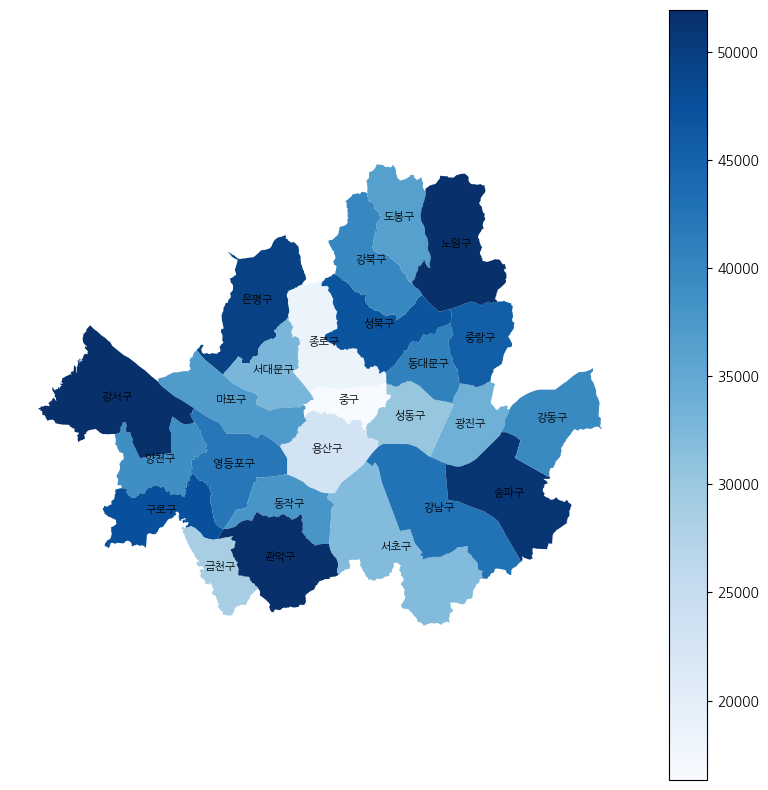

In [17]:
merged_data3 = seoul.merge(result3, left_on = 'SIG_KOR_NM', right_on='자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data3.plot(column = '쇼핑 서비스 사용 미추정 인구수', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data3.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

### 자치구별 쇼핑 서비스 사용일수 지도 히트맵

In [18]:
# 자치구별 평균 쇼핑 서비스 사용일수
result4 = round(df[['자치구', '쇼핑 서비스 사용일수']].groupby(['자치구'], as_index = False).mean().sort_values(by = '쇼핑 서비스 사용일수', ascending = False).reset_index(drop = True),2)
result4.head(10)

,자치구,쇼핑 서비스 사용일수
0,은평구,122.47
1,노원구,122.36
2,도봉구,122.07
3,강북구,121.84
4,강서구,121.80
5,영등포구,121.66
6,용산구,121.64
7,동대문구,121.08
8,성동구,120.85
9,성북구,120.84


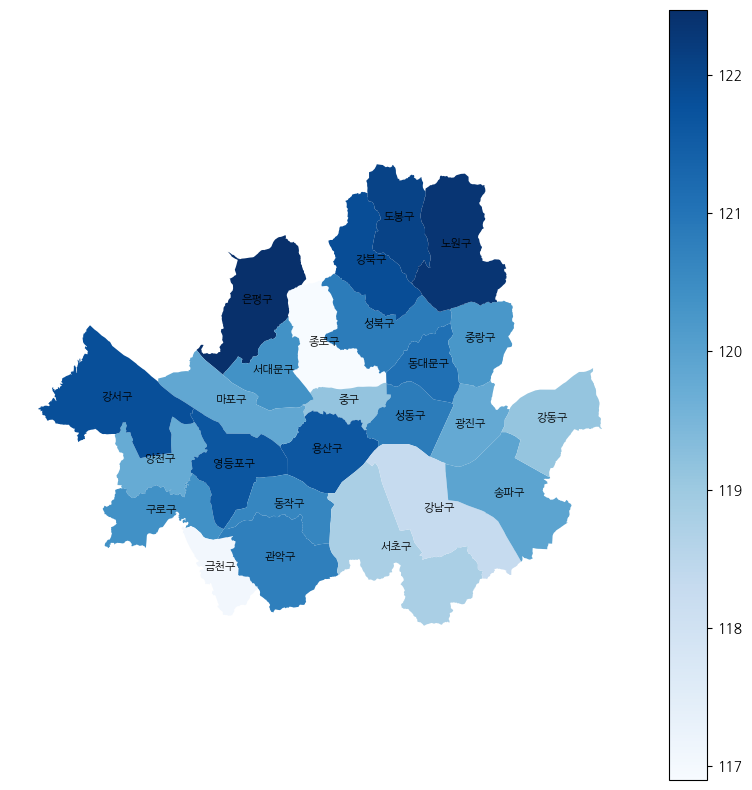

In [19]:
merged_data4 = seoul.merge(result4, left_on = 'SIG_KOR_NM', right_on='자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data4.plot(column = '쇼핑 서비스 사용일수', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data4.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

## 택배데이터

### 자치구별 가구/인테리어 착지물동량 지도 히트맵

In [20]:
# 자치구별 가구/인테리어 착지물동량 합계
result1 = new_df[['자치구', '가구/인테리어']].groupby(['자치구'], as_index = False).sum().sort_values(by = '가구/인테리어', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,가구/인테리어
0,구로구,3909018.574
1,노원구,3780673.471
2,성동구,3222012.938
3,양천구,2969673.223
4,관악구,2960630.620
5,동작구,2894524.977
6,도봉구,2865226.054
7,금천구,2820768.701
8,영등포구,2771721.274
9,은평구,2683152.127


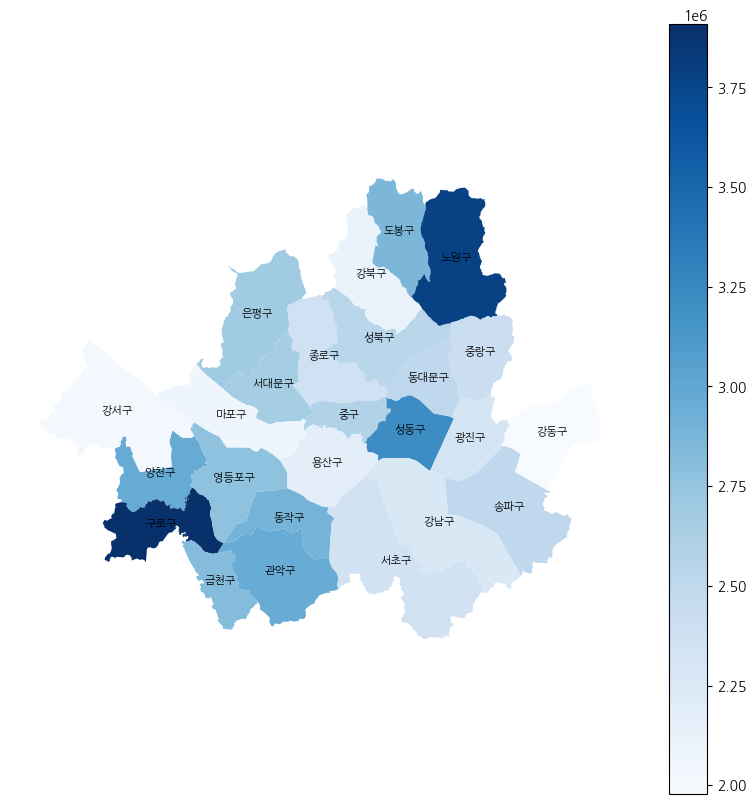

In [21]:
merged_data1 = seoul.merge(result1, left_on = 'SIG_KOR_NM', right_on='자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data1.plot(column = '가구/인테리어', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data1.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

### 자치구별 도서/음반 착지물동량 지도 히트맵

In [22]:
# 자치구별 도서/음반 착지물동량 합계
result2 = new_df[['자치구', '도서/음반']].groupby(['자치구'], as_index = False).sum().sort_values(by = '도서/음반', ascending = False).reset_index(drop = True)
result2.head(10)

,자치구,도서/음반
0,성동구,2008616.420
1,동대문구,1952108.351
2,양천구,1677630.450
3,중랑구,1550402.996
4,광진구,1531233.512
5,영등포구,1509281.022
6,서초구,1506478.559
7,은평구,1451166.933
8,마포구,1447093.868
9,구로구,1434141.043


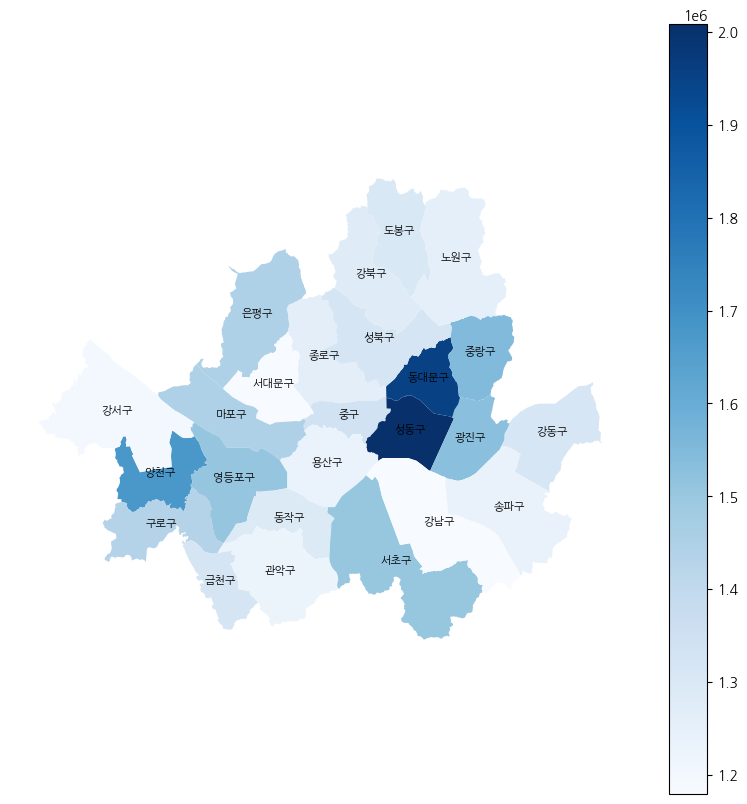

In [23]:
merged_data2 = seoul.merge(result2, left_on = 'SIG_KOR_NM', right_on='자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data2.plot(column = '도서/음반', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data2.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

### 자치구별 디지털/가전 착지물동량 지도 히트맵

In [24]:
# 자치구별 디지털/가전 착지물동량 합계
result3 = round(new_df[['자치구', '디지털/가전']].groupby(['자치구'], as_index = False).sum().sort_values(by = '디지털/가전', ascending = False).reset_index(drop = True), 2)
result3.head(10)

,자치구,디지털/가전
0,서대문구,1647966.57
1,강서구,1620954.21
2,중구,1431324.82
3,금천구,1316285.34
4,도봉구,1235361.30
5,강남구,1231625.57
6,동작구,1228877.20
7,구로구,1224594.08
8,마포구,1224503.94
9,송파구,1218492.75


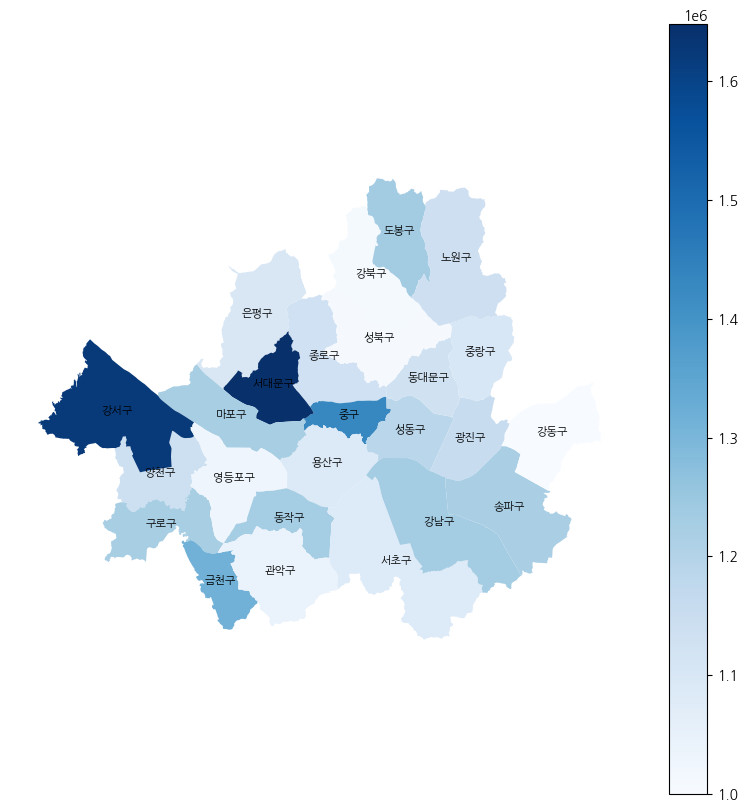

In [25]:
merged_data3 = seoul.merge(result3, left_on = 'SIG_KOR_NM', right_on='자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data3.plot(column = '디지털/가전', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data3.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

### 자치구별 생활/건강 착지물동량 지도 히트맵

In [26]:
# 자치구별 생활/건강 착지물동량 합계
result4 = round(new_df[['자치구', '생활/건강']].groupby(['자치구'], as_index = False).sum().sort_values(by = '생활/건강', ascending = False).reset_index(drop = True),2)
result4.head(10)

,자치구,생활/건강
0,중구,12190842.26
1,강북구,11791145.58
2,동대문구,7546920.60
3,서대문구,7464800.22
4,강서구,6215717.12
5,금천구,6199528.14
6,구로구,5775521.63
7,성동구,5739784.86
8,양천구,5713192.42
9,송파구,5323198.35


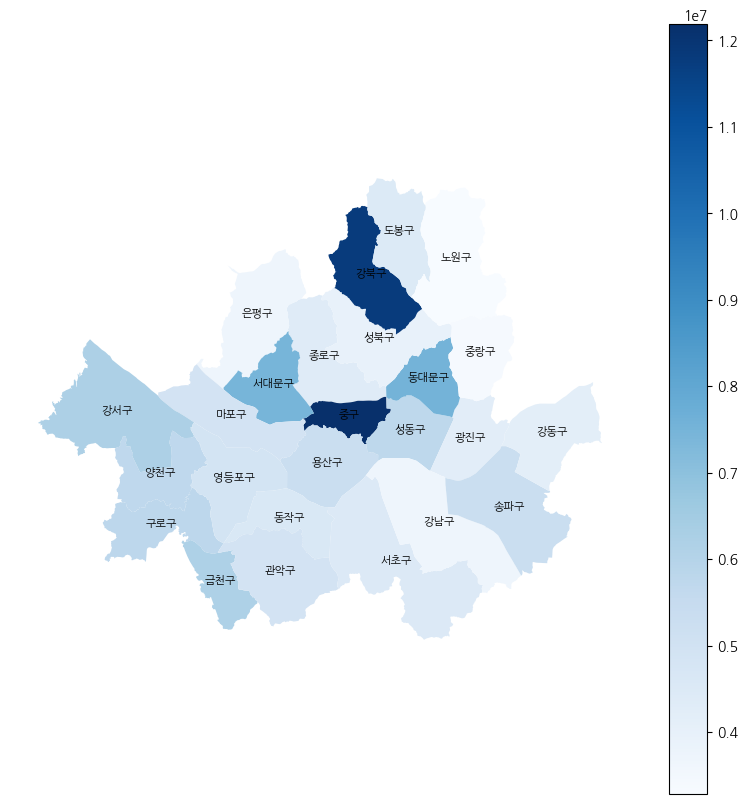

In [27]:
merged_data4 = seoul.merge(result4, left_on = 'SIG_KOR_NM', right_on='자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data4.plot(column = '생활/건강', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data4.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

### 자치구별 스포츠/레저 착지물동량 지도 히트맵

In [28]:
# 자치구별 스포츠/레저 착지물동량 합계
result5 = new_df[['자치구', '스포츠/레저']].groupby(['자치구'], as_index = False).sum().sort_values(by = '스포츠/레저', ascending = False).reset_index(drop = True)
result5.head(10)

,자치구,스포츠/레저
0,동작구,84935
1,구로구,73084
2,강남구,71294
3,영등포구,67425
4,송파구,64898
5,강북구,63572
6,도봉구,61836
7,은평구,61578
8,용산구,61101
9,성동구,58761


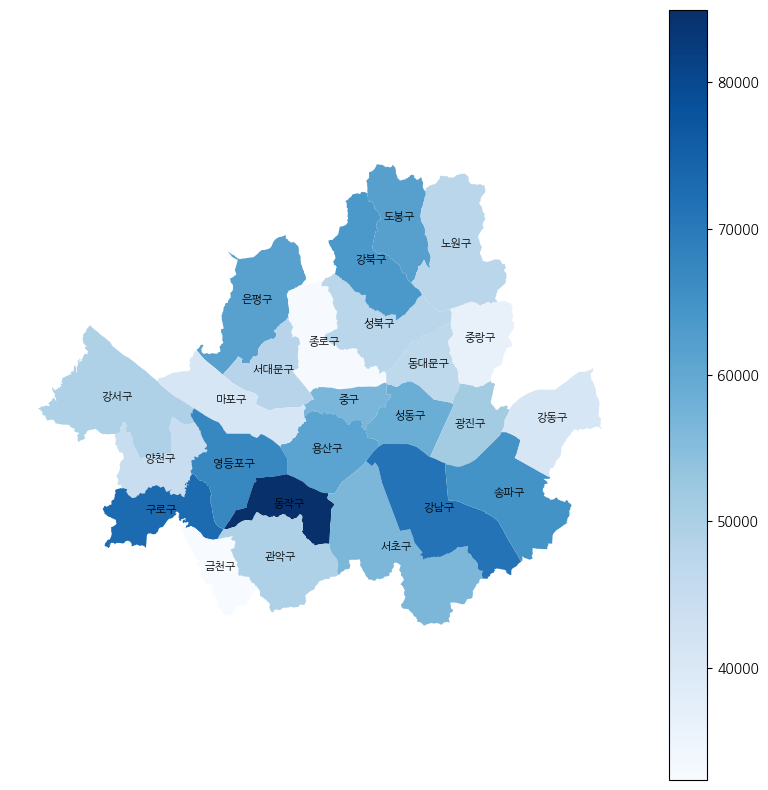

In [29]:
merged_data5 = seoul.merge(result5, left_on = 'SIG_KOR_NM', right_on='자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data5.plot(column = '스포츠/레저', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data5.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

### 자치구별 식품 착지물동량 지도 히트맵

In [30]:
# 자치구별 식품 착지물동량 합계
result6 = new_df[['자치구', '식품']].groupby(['자치구'], as_index = False).sum().sort_values(by = '식품', ascending = False).reset_index(drop = True)
result6.head(10)

,자치구,식품
0,영등포구,817324
1,서대문구,767844
2,송파구,755618
3,중랑구,712389
4,금천구,686521
5,노원구,671998
6,중구,635290
7,종로구,600742
8,도봉구,598036
9,강북구,597931


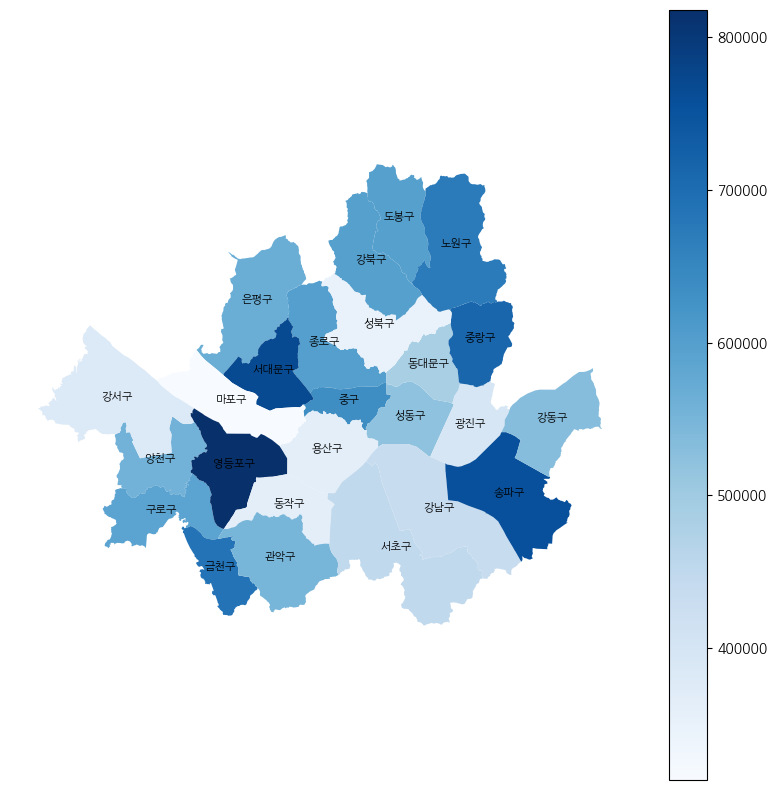

In [31]:
merged_data6 = seoul.merge(result6, left_on = 'SIG_KOR_NM', right_on='자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data6.plot(column = '식품', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data6.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

### 자치구별 출산/육아 착지물동량 지도 히트맵

In [32]:
# 자치구별 출산/육아 착지물동량 합계
result7 = new_df[['자치구', '출산/육아']].groupby(['자치구'], as_index = False).sum().sort_values(by = '출산/육아', ascending = False).reset_index(drop = True)
result7.head(10)

,자치구,출산/육아
0,은평구,152760
1,도봉구,122002
2,광진구,121158
3,중구,102100
4,서초구,92995
5,송파구,85901
6,성동구,83102
7,금천구,81501
8,양천구,79649
9,중랑구,78889


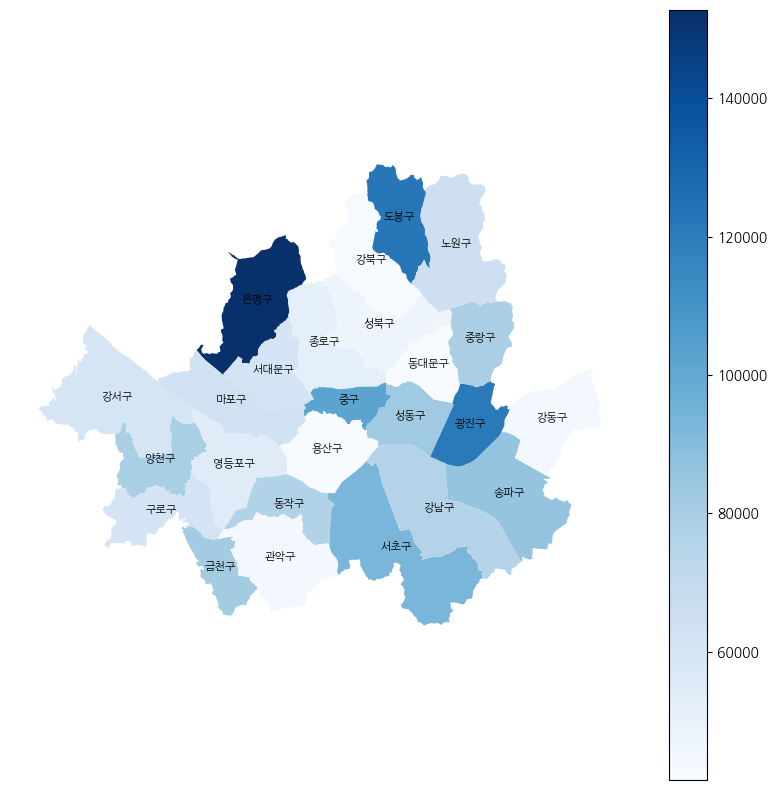

In [33]:
merged_data7 = seoul.merge(result7, left_on = 'SIG_KOR_NM', right_on='자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data7.plot(column = '출산/육아', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data7.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

### 자치구별 패션의류 착지물동량 지도 히트맵

In [34]:
# 자치구별 패션의류 착지물동량 합계
result8 = new_df[['자치구', '패션의류']].groupby(['자치구'], as_index = False).sum().sort_values(by = '패션의류', ascending = False).reset_index(drop = True)
result8.head(10)

,자치구,패션의류
0,강남구,396901
1,서대문구,394818
2,양천구,337865
3,은평구,319730
4,영등포구,291243
5,강북구,285998
6,관악구,280907
7,용산구,253974
8,강동구,251420
9,구로구,250427


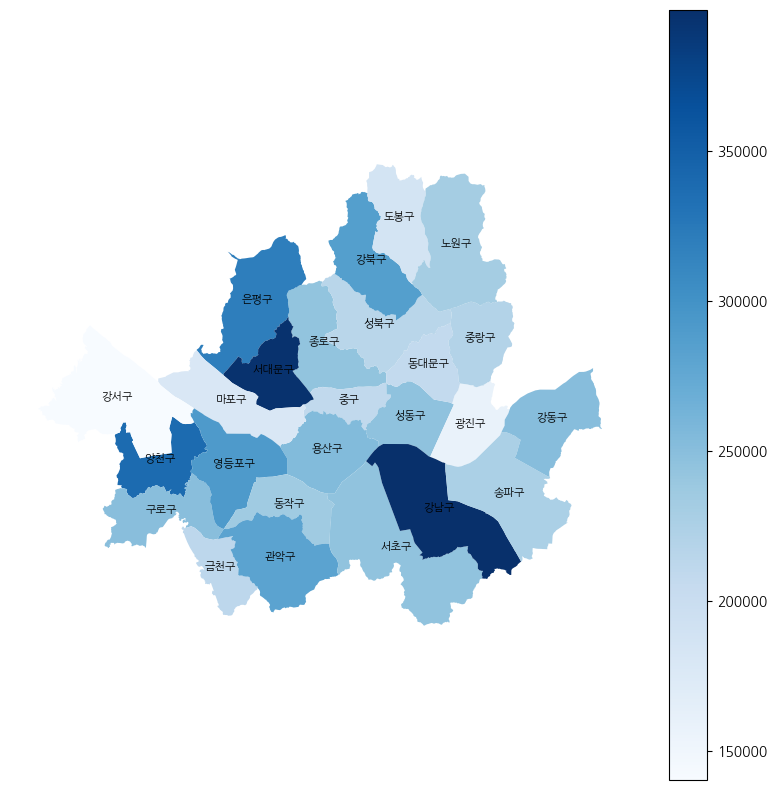

In [35]:
merged_data8 = seoul.merge(result8, left_on = 'SIG_KOR_NM', right_on='자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data8.plot(column = '패션의류', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data8.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

### 자치구별 패션잡화 착지물동량

In [36]:
# 자치구별 패션잡화 착지물동량 합계
result9 = new_df[['자치구', '패션잡화']].groupby(['자치구'], as_index = False).sum().sort_values(by = '패션잡화', ascending = False).reset_index(drop = True)
result9.head(10)

,자치구,패션잡화
0,송파구,387945
1,금천구,383804
2,강남구,379498
3,종로구,311799
4,양천구,289261
5,은평구,278663
6,마포구,276001
7,중랑구,268045
8,관악구,261992
9,노원구,254941


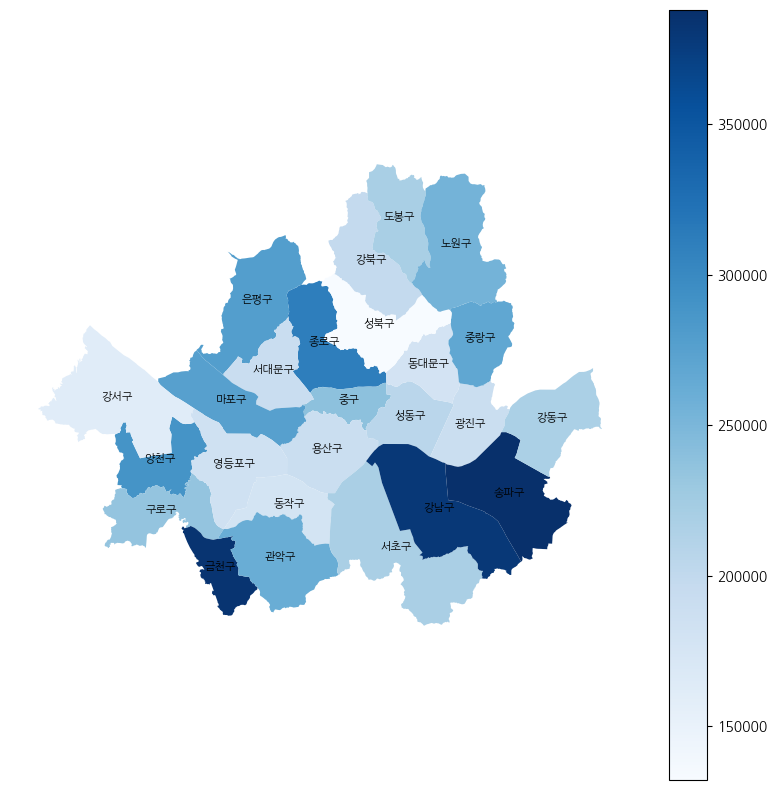

In [37]:
merged_data9 = seoul.merge(result9, left_on = 'SIG_KOR_NM', right_on='자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data9.plot(column = '패션잡화', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data9.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

### 자치구별 화장품/미용 착지물동량 지도 히트맵

In [38]:
result10 = new_df[['자치구', '화장품/미용']].groupby(['자치구'], as_index = False).sum().sort_values(by = '화장품/미용', ascending = False).reset_index(drop = True)
result10.head(10)

,자치구,화장품/미용
0,성동구,193357
1,종로구,178267
2,은평구,168469
3,강남구,130982
4,구로구,127977
5,성북구,124865
6,마포구,116287
7,동작구,112652
8,노원구,110345
9,강북구,106838


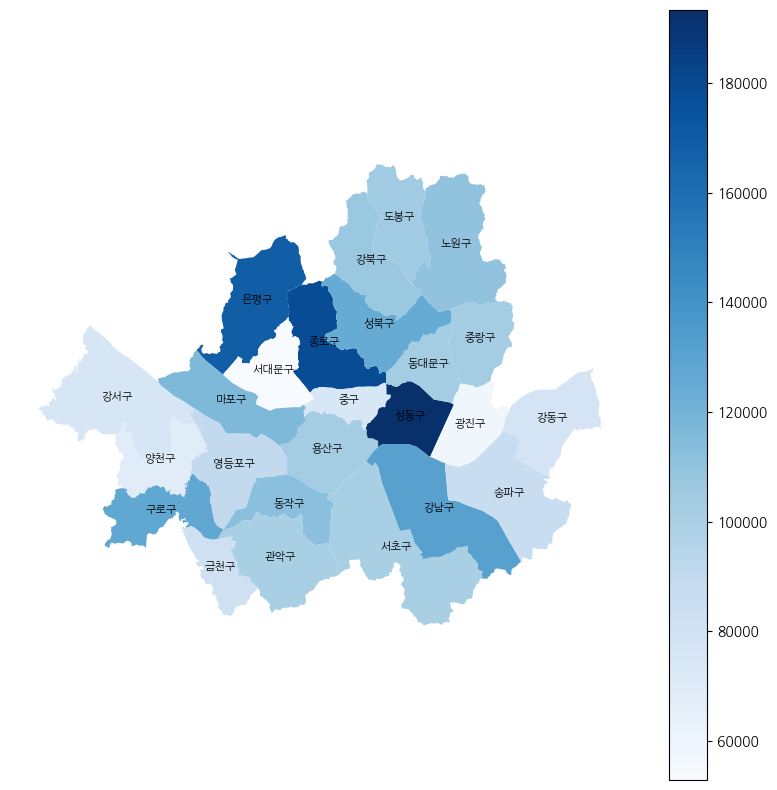

In [39]:
merged_data10 = seoul.merge(result10, left_on = 'SIG_KOR_NM', right_on='자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data10.plot(column = '화장품/미용', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data10.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()

### 자치구별 DIY자재/용품 착지물동량 지도 히트맵

In [40]:
# 자치구별 DIY자재/용품 착지물동량 합계
result11 = new_df[['자치구', 'DIY자재/용품']].groupby(['자치구'], as_index = False).sum().sort_values(by = 'DIY자재/용품', ascending = False).reset_index(drop = True)
result11.head(10)

,자치구,DIY자재/용품
0,성북구,569299
1,노원구,554077
2,금천구,467017
3,서대문구,408935
4,강남구,398892
5,서초구,368613
6,강서구,349624
7,송파구,344244
8,성동구,343706
9,광진구,340758


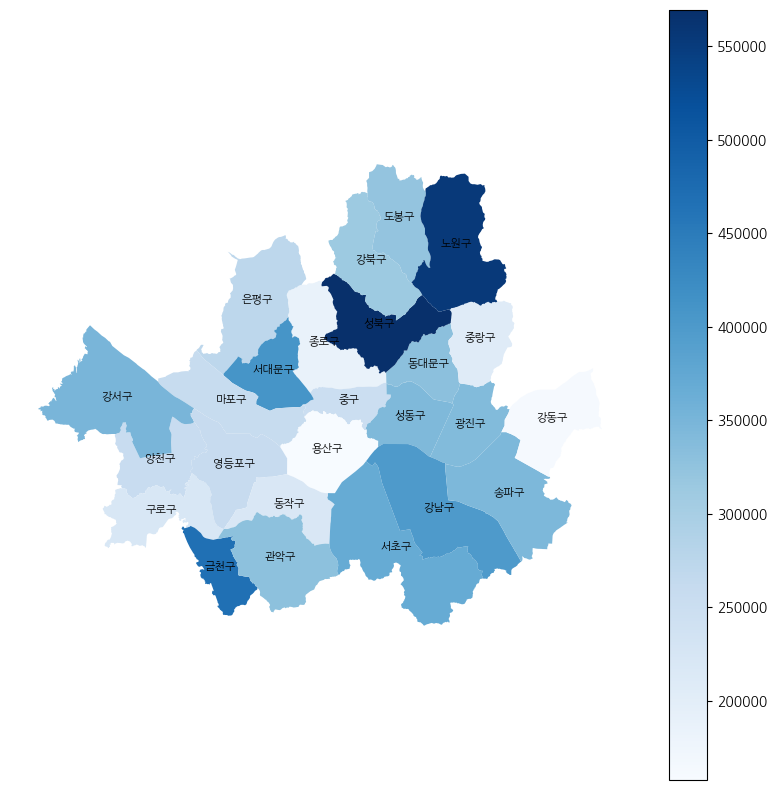

In [41]:
merged_data11 = seoul.merge(result11, left_on = 'SIG_KOR_NM', right_on='자치구')
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()

# 자치구별 총인구수 합계에 따라 색상 매핑
merged_data11.plot(column = 'DIY자재/용품', cmap = 'Blues', linewidth = 0.8, ax = ax, legend = True)

# 자치구 이름 출력
for idx, row in merged_data11.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['SIG_KOR_NM'], fontsize = 8, ha = 'center')

plt.show()